In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('archive.zip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [4]:
df_new = df[['Ticket ID', 'Ticket Subject', 'Ticket Description', 'Ticket Priority']]
df_new.head(10)

Ticket ID            Ticket Subject  \
0          1             Product setup   
1          2  Peripheral compatibility   
2          3           Network problem   
3          4            Account access   
4          5                 Data loss   
5          6             Payment issue   
6          7            Refund request   
7          8              Battery life   
8          9      Installation support   
9         10             Payment issue   

                                  Ticket Description Ticket Priority  
0  I'm having an issue with the {product_purchase...        Critical  
1  I'm having an issue with the {product_purchase...        Critical  
2  I'm facing a problem with my {product_purchase...             Low  
3  I'm having an issue with the {product_purchase...             Low  
4  I'm having an issue with the {product_purchase...             Low  
5  I'm facing a problem with my {product_purchase...             Low  
6  I'm unable to access my {product_purchased} ac...        Critical  
7  I'm having an issue with the {product_purchase...        Critical  
8  I'm having an issue with the {product_purchase...             Low  
9  My {product_purchased} is making strange noise...        Critical

In [5]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Ticket ID           8469 non-null   int64 
 1   Ticket Subject      8469 non-null   object
 2   Ticket Description  8469 non-null   object
 3   Ticket Priority     8469 non-null   object
dtypes: int64(1), object(3)
memory usage: 264.8+ KB


In [6]:
df_low = df_new[df_new['Ticket Priority'] == 'Low']
df_medium = df_new[df_new['Ticket Priority'] == 'Medium']
df_high = df_new[df_new['Ticket Priority'] == 'High']
df_critical = df_new[df_new['Ticket Priority'] == 'Critical']

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [36]:
import re

In [ ]:
stopwords = set(STOPWORDS)

In [38]:
pattern = r'\{*+\}'
re.sub(pattern, "", "\{hello\} hi")

error: multiple repeat at position 3

In [31]:
comment_words = {}
# iterate through the csv file
datas = [df_low, df_medium, df_high, df_critical]
label = ['low', 'medium', 'high', 'critical']
for idx, data in enumerate(datas):
	comment_words[label[idx]] = ''
	for val in data['Ticket Description']:
		
		# typecaste each val to string
		val = str(val)

		# split the value
		tokens = val.split()
		
		# Converts each token into lowercase
		for i in range(len(tokens)):
			tokens[i] = tokens[i].lower()
		
		comment_words[label[idx]] += " ".join(tokens)+" "

In [32]:
comment_words

{'low': 'i\'m facing a problem with my {product_purchased}. the {product_purchased} is not turning on. it was working fine until yesterday, but now it doesn\'t respond. 1.8.3 i really i\'m using the original charger that came with my {product_purchased}, but it\'s not charging properly. i\'m having an issue with the {product_purchased}. please assist. if you have a problem you\'re interested in and i\'d love to see this happen, please check out the feedback. i\'ve already contacted customer support multiple times, but the issue remains unresolved. i\'m having an issue with the {product_purchased}. please assist. note: the seller is not responsible for any damages arising out of the delivery of the battleground game. please have the game in good condition and shipped to you i\'ve noticed a sudden decrease in battery life on my {product_purchased}. it used to last much longer. i\'m facing a problem with my {product_purchased}. the {product_purchased} is not turning on. it was working fin

In [33]:
wordcloud_low = WordCloud(width = 400, height = 200,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words['low'])
wordcloud_medium = WordCloud(width = 400, height = 200,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words['medium'])
wordcloud_high = WordCloud(width = 400, height = 200,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words['high'])
wordcloud_critical = WordCloud(width = 400, height = 200,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words['critical'])

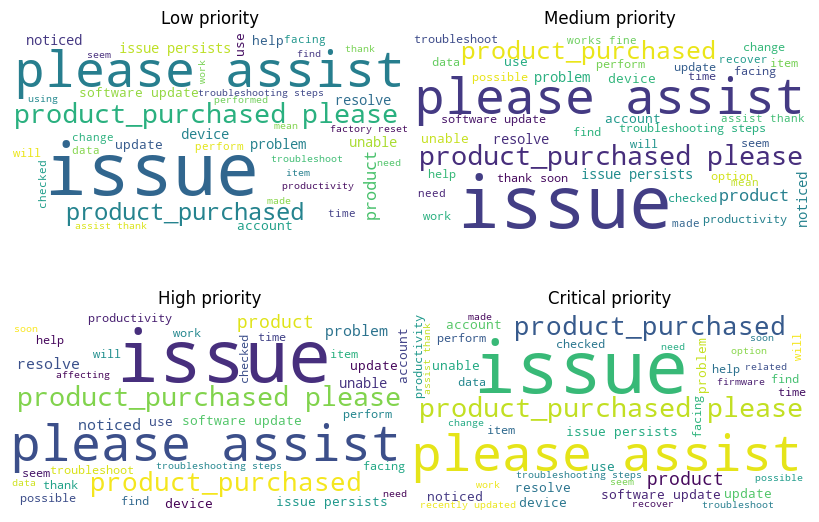

In [34]:
# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None)
plt.subplot(2,2,1)
plt.imshow(wordcloud_low)
plt.axis("off")
plt.title('Low priority')
plt.tight_layout(pad = 0)

plt.subplot(2,2,2)
plt.imshow(wordcloud_medium)
plt.axis("off")
plt.title('Medium priority')
plt.tight_layout(pad = 0)

plt.subplot(2,2,3)
plt.imshow(wordcloud_high)
plt.axis("off")
plt.title('High priority')
plt.tight_layout(pad = 0)

plt.subplot(2,2,4)
plt.imshow(wordcloud_critical)
plt.axis("off")
plt.title('Critical priority')
plt.tight_layout(pad = 0)

plt.show()